**Importing Basic Libraries**

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from matplotlib import rcParams
rcParams['figure.figsize'] = (15, 5)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


**Loading & Dataset**

In [88]:
data = pd.read_csv('KaggleV2-May-2016.csv')


**Feature Exploration**

In [89]:
print(len(data))
data.head()

110527


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.263e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [90]:
for column in data.columns:
    print(f"{column:25} {data[column].nunique()}")


PatientId                 62299
AppointmentID             110527
Gender                    2
ScheduledDay              103549
AppointmentDay            27
Age                       104
Neighbourhood             81
Scholarship               2
Hipertension              2
Diabetes                  2
Alcoholism                2
Handcap                   5
SMS_received              2
No-show                   2


**Data Visualization**

In [91]:

def features_plots(discrete_vars):
    continuous_vars = ['Age', 'AwaitingTime']
    total_plots = len(continuous_vars) + len(discrete_vars)

    plt.figure(figsize=(15, total_plots * 3))

    # Plot continuous features
    for i, cv in enumerate(continuous_vars):
        plt.subplot(total_plots, 1, i + 1)
        plt.hist(data[cv], bins=30, color='skyblue', edgecolor='black')
        plt.title(f"Histogram of {cv}")
        plt.ylabel("Frequency")

    # Plot discrete features
    for i, dv in enumerate(discrete_vars):
        plt.subplot(total_plots, 1, len(continuous_vars) + i + 1)
        data[dv].value_counts().plot(kind='bar', color='salmon')
        plt.title(f"Bar Chart of {dv}")
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()


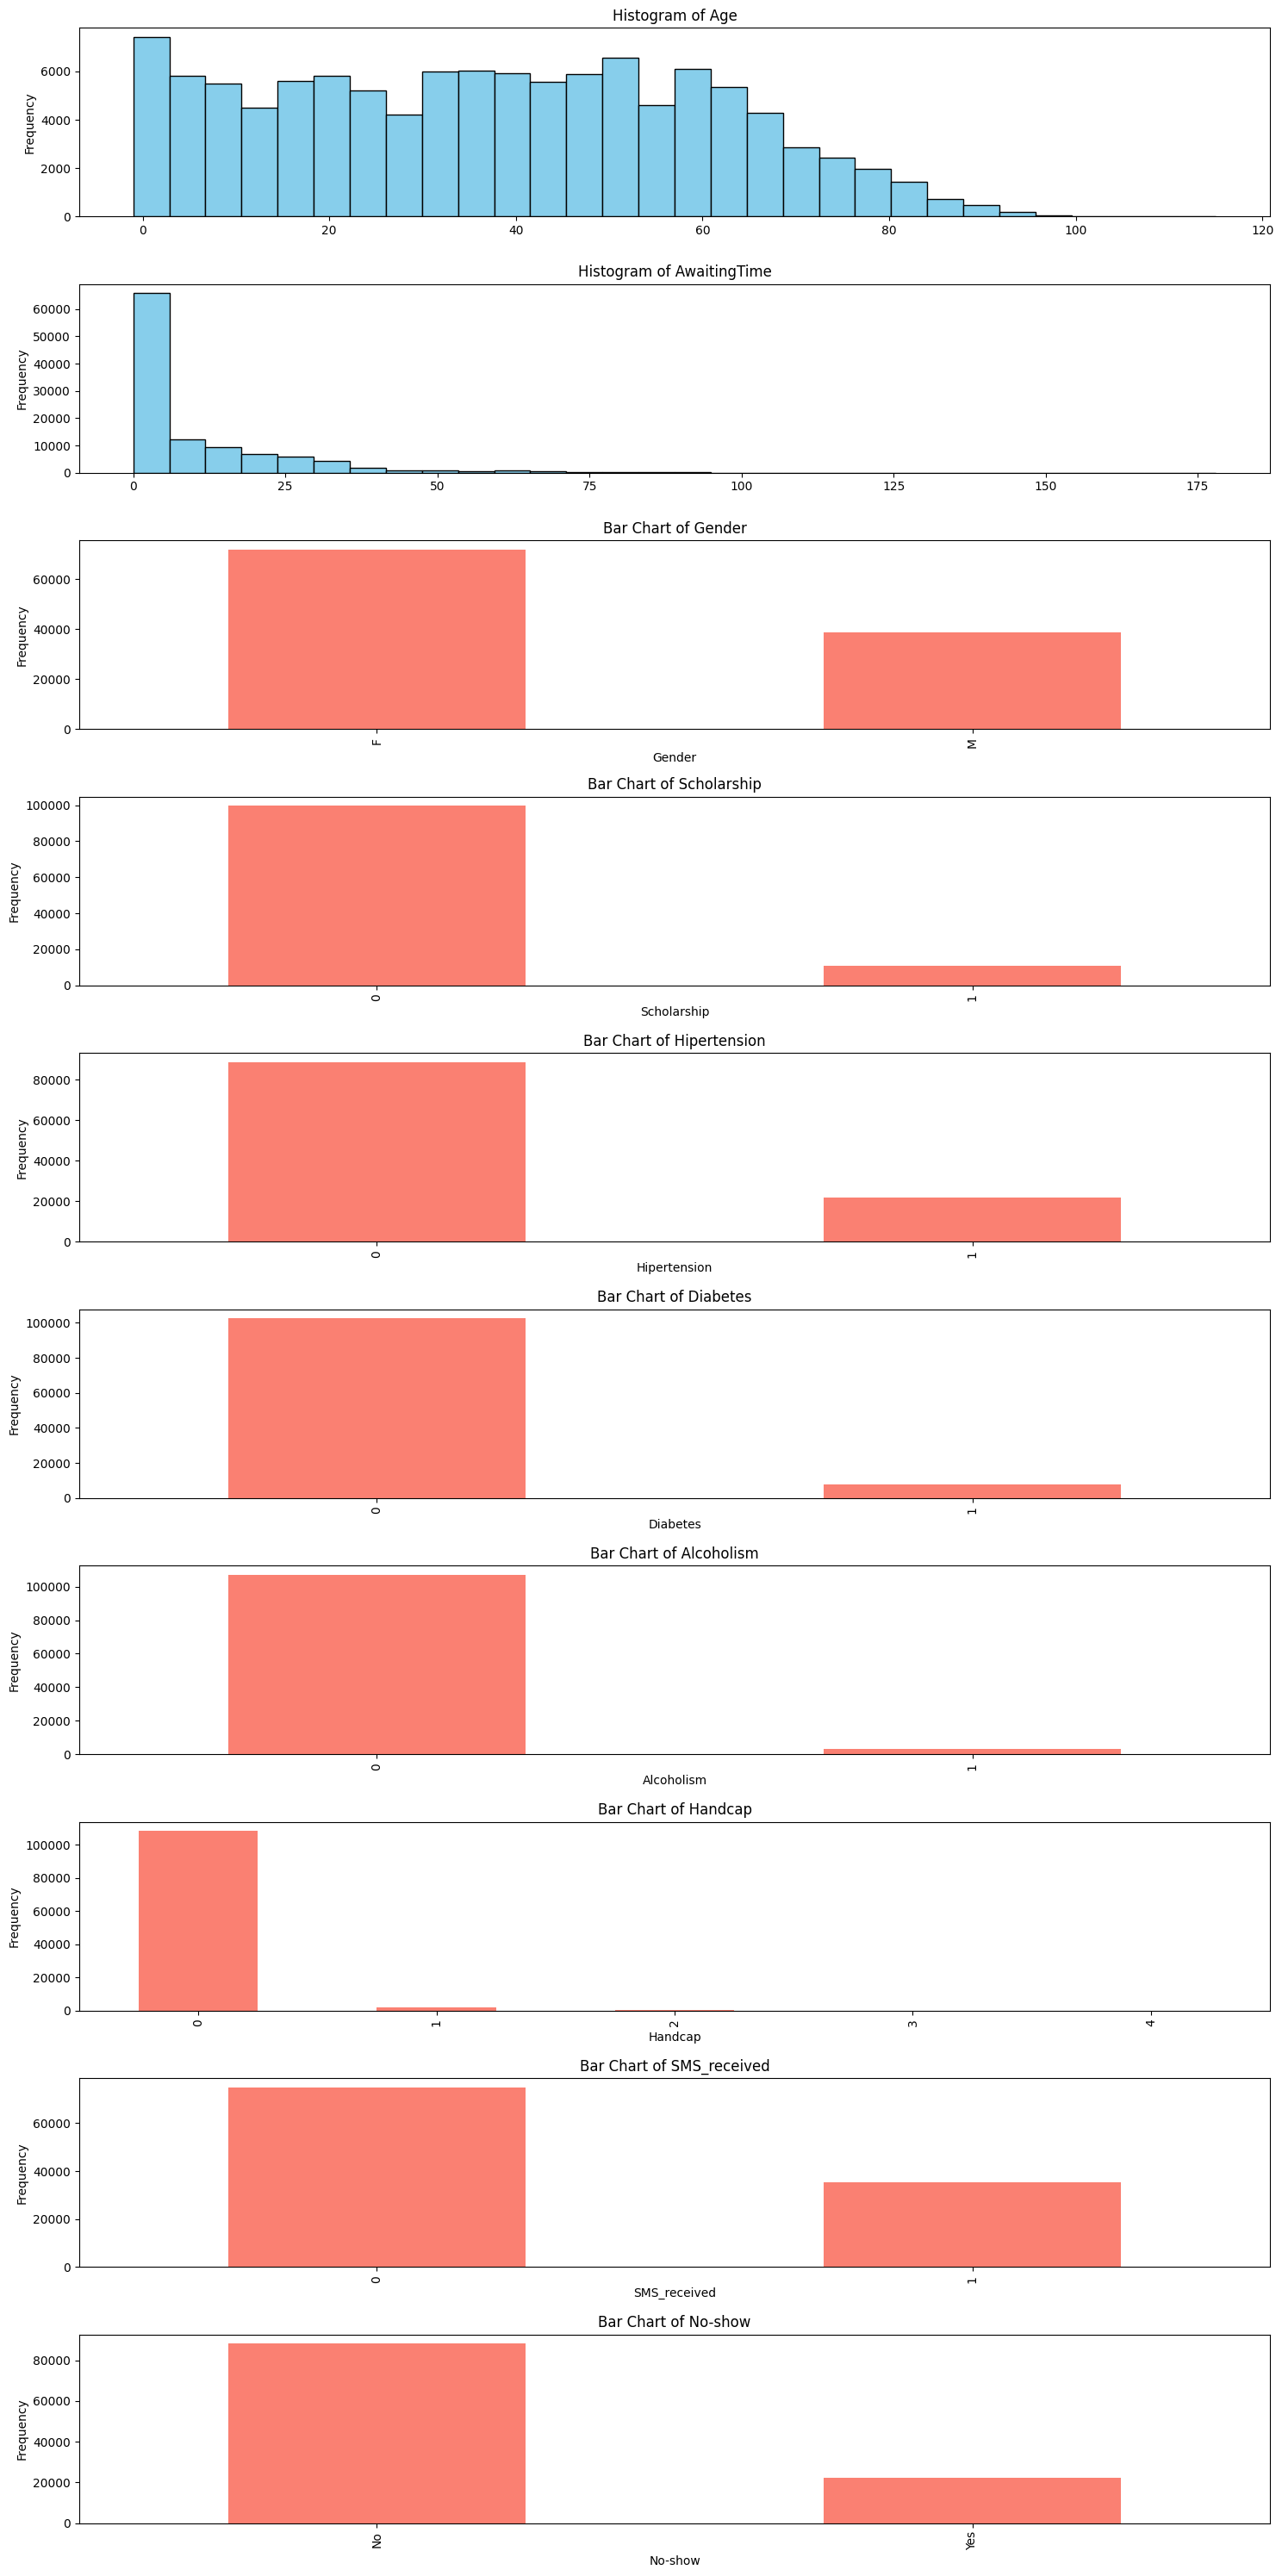

In [92]:

# ✅ Make sure ScheduledDay and AppointmentDay are datetime
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# ✅ Create AwaitingTime column
data['AwaitingTime'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# Optional: Set negative values to 0 if they exist due to timestamp issues
data['AwaitingTime'] = data['AwaitingTime'].apply(lambda x: max(x, 0))

# ✅ Now define discrete variables (based on your actual columns)
discrete_vars = [
    'Gender',
    'Scholarship',
    'Hipertension',
    'Diabetes',
    'Alcoholism',
    'Handcap',
    'SMS_received',
    'No-show'
]

# ✅ Call the function now that AwaitingTime is defined
features_plots( discrete_vars)


**Histogram of Age**

Displays the distribution of ages, indicating a higher frequency among younger individuals.

**Histogram of Awaiting Time**

Shows a right-skewed distribution with most individuals having shorter waiting times.

**Bar Chart of Gender**

Illustrates a predominance of females compared to males in the dataset.

**Bar Chart of Scholarship**

Indicates a significantly higher count of individuals without scholarships.

**Bar Chart of Hypertension**

Reveals that most individuals do not have hypertension, with only a small portion affected.

**Bar Chart of Diabetes**

Similar to hypertension, most individuals are not diabetic.

**Bar Chart of Alcoholism**

Depicts that a majority of individuals do not suffer from alcoholism.

**Bar Chart of Handicap**

Shows that most individuals do not have any handicaps.

**Bar Chart of SMS Received**

Displays a high number of individuals who did not receive SMS notifications.

**Bar Chart of No-show**

Indicates that the majority of individuals attended their appointments, with a small fraction missing.

**Checking Null Values**

In [93]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
AwaitingTime      0
dtype: int64

**Feature Selection**

In [94]:
data = data.drop(columns=['Handcap'])

In [95]:
data['AwaitingTime'] = data['AwaitingTime'].apply(lambda x: abs(x))

**Data Encoding(Label Encoding)**

In [96]:
gender_mapping = {'F': 0, 'M': 1}
data['Gender'] = data['Gender'].map(gender_mapping)


**Data Encoding(One-Hot Encoding)**

In [97]:
data = pd.get_dummies(data, columns=['Neighbourhood'], prefix='Nbhd')


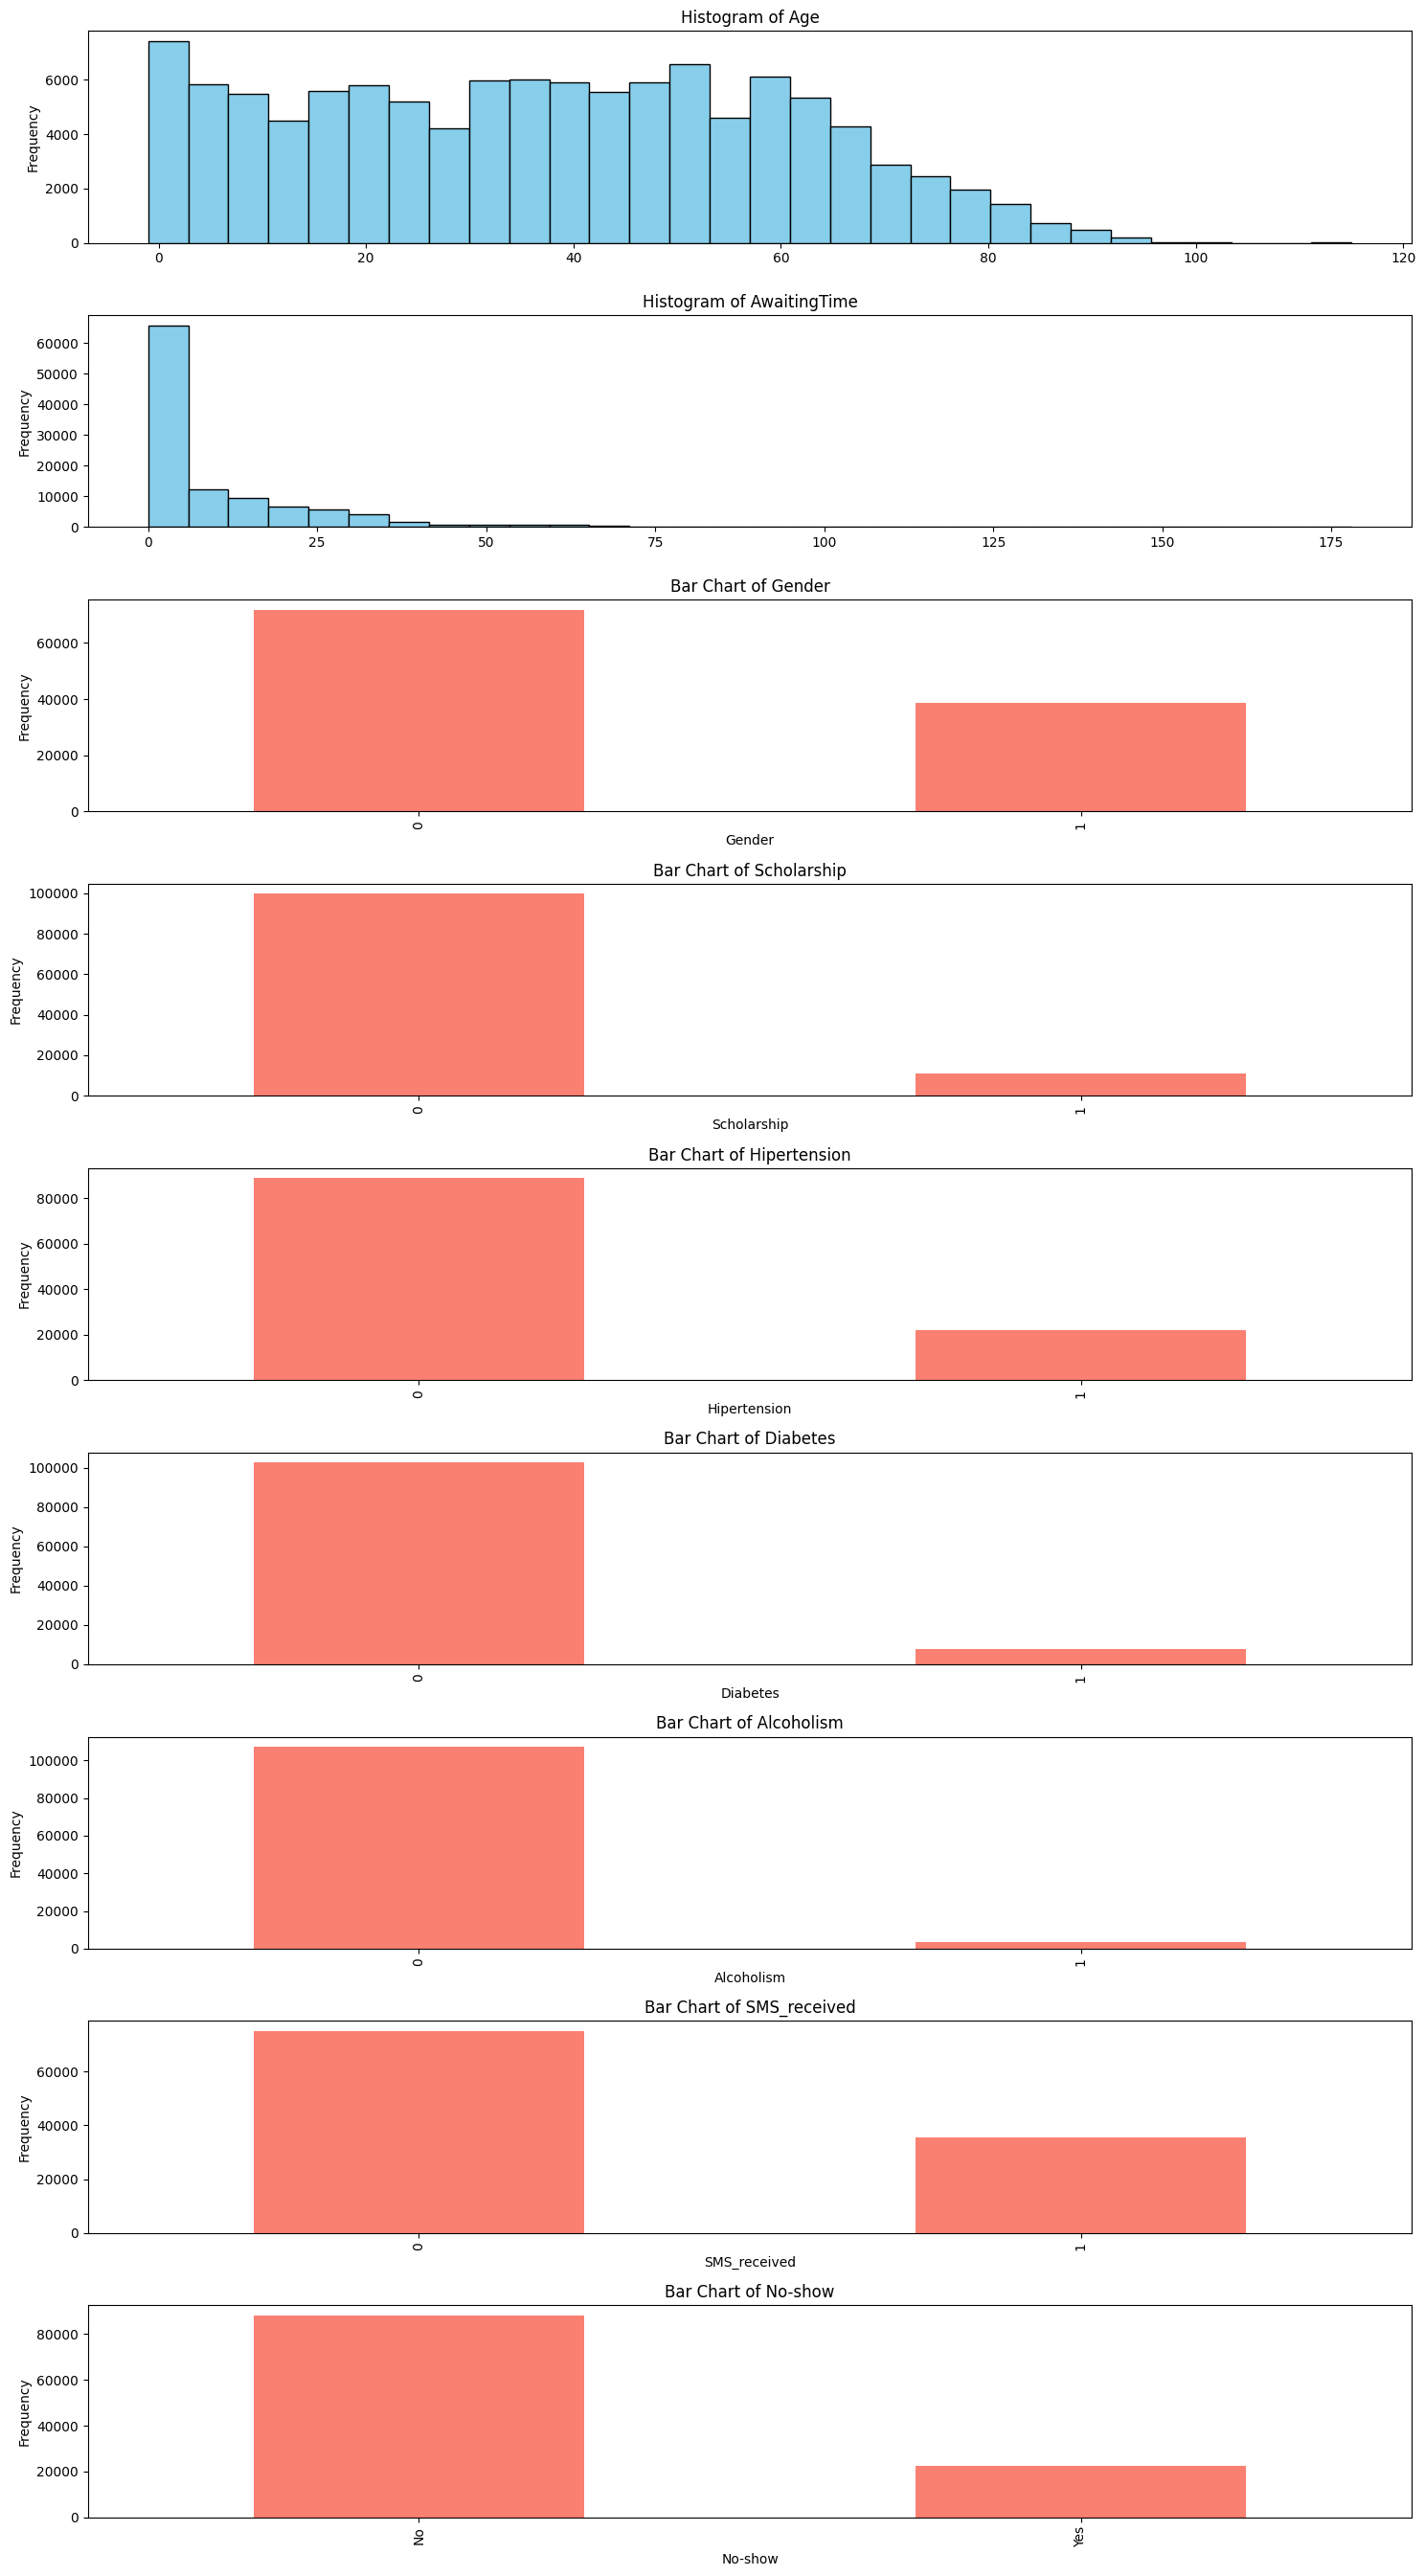

In [98]:
discrete_vars = [
    'Gender',
    'Scholarship',
    'Hipertension',
    'Diabetes',
    'Alcoholism',
    'SMS_received',
    'No-show'
]
features_plots( discrete_vars)

**Exploratory Data Analysis**

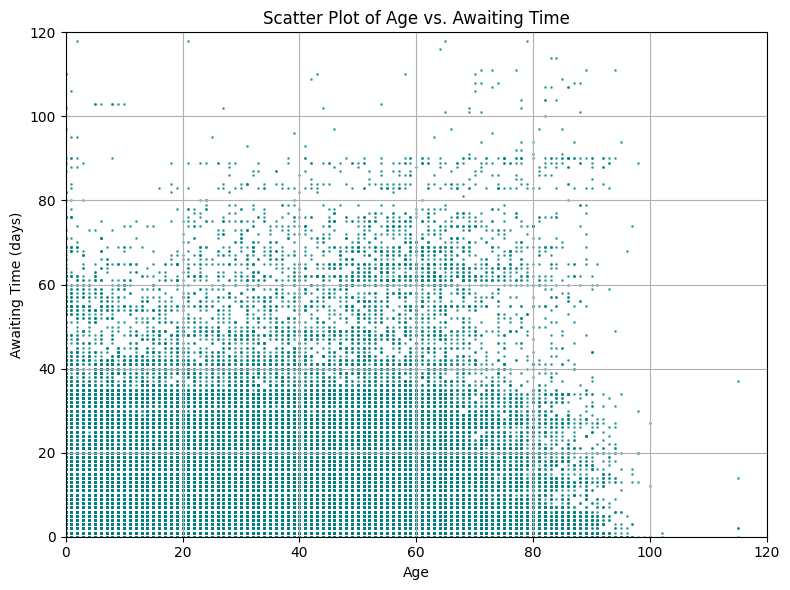

In [99]:

plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['AwaitingTime'], s=1, alpha=0.6, color='teal')
plt.title('Scatter Plot of Age vs. Awaiting Time')
plt.xlabel('Age')
plt.ylabel('Awaiting Time (days)')
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
# Set display options (optional for better output formatting)
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)

# Compute Pearson correlation
correlations = data[['Age', 'AwaitingTime']].corr(method='pearson')

# Print correlation matrix
print(correlations)


                Age  AwaitingTime
Age           1.000         0.033
AwaitingTime  0.033         1.000


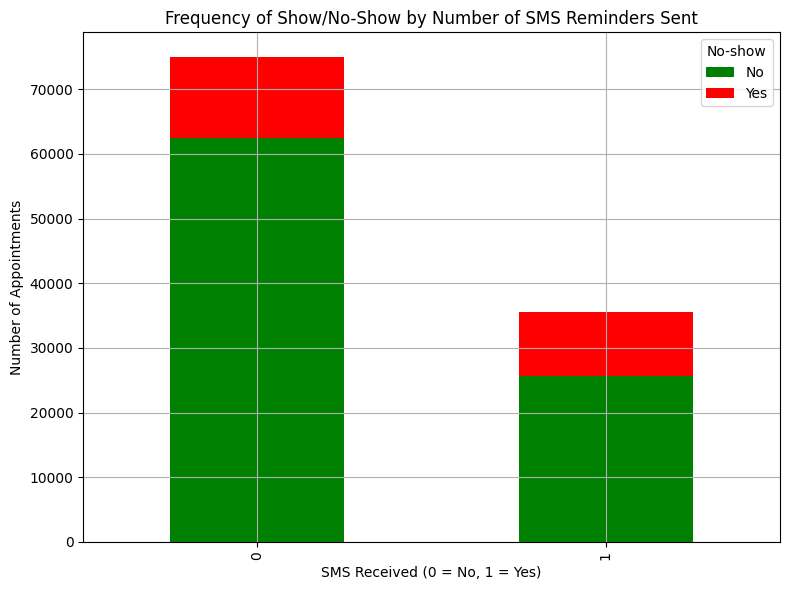

In [101]:

data_dow_status = data.groupby(['SMS_received', 'No-show'])['SMS_received'] \
                      .count().unstack('No-show').fillna(0)

# Plot as stacked bar chart
data_dow_status[[ 'No', 'Yes']].plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])

plt.title('Frequency of Show/No-Show by Number of SMS Reminders Sent')
plt.xlabel('SMS Received (0 = No, 1 = Yes)')
plt.ylabel('Number of Appointments')
plt.legend(title='No-show')
plt.tight_layout()
plt.grid(True)
plt.show()


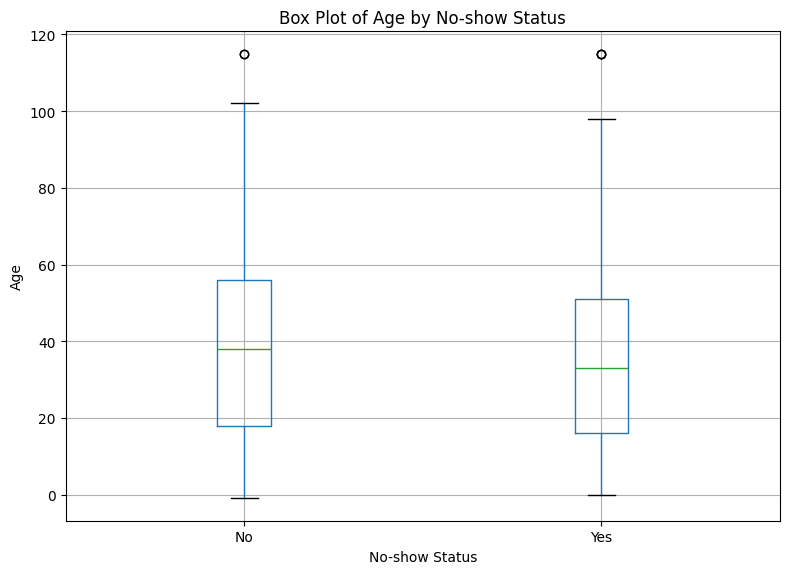

In [102]:

# Box plot of Age grouped by No-show status
data.boxplot(column='Age', by='No-show', figsize=(8, 6))
plt.title('Box Plot of Age by No-show Status')
plt.suptitle('')  # Removes the default Pandas title
plt.xlabel('No-show Status')
plt.ylabel('Age')
plt.grid(True)
plt.tight_layout()
plt.show()


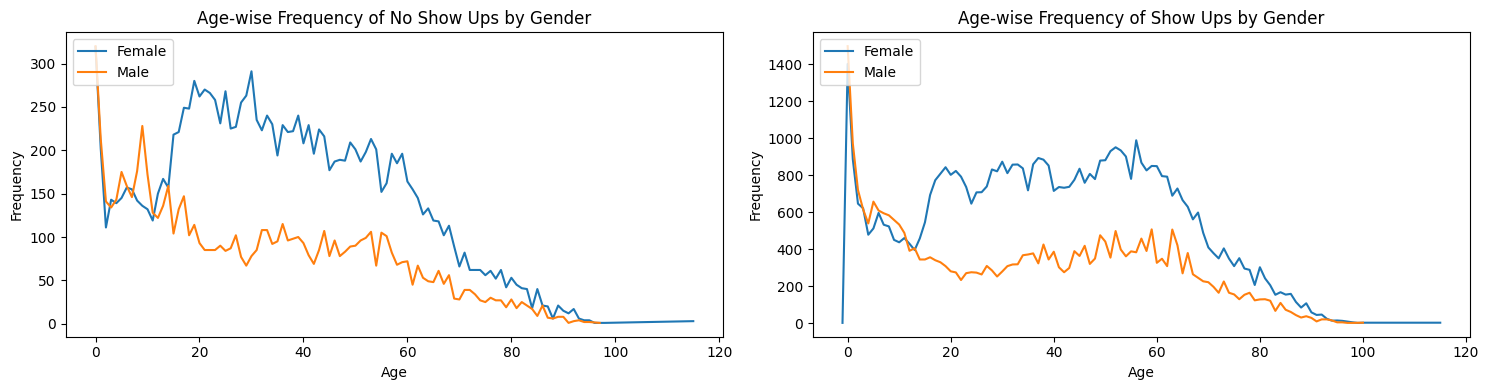

In [103]:

plt.figure(figsize=(15, 4))

# Assuming: 1 = No-show, 0 = Show-up
status_labels = {1: 'no show ups', 0: 'show ups'}
gender_labels = {0: 'Female', 1: 'Male'}

for i, (status_val, status_name) in enumerate(status_labels.items()):
    data_show = data[data['No-show'].map({'No': 0, 'Yes': 1}) == status_val]
    
    plt.subplot(1, 2, i + 1)
    for gender_val in [0, 1]:
        data_gender = data_show[data_show['Gender'] == gender_val]
        freq_age = data_gender['Age'].value_counts().sort_index()
        freq_age.plot()

    plt.title(f'Age-wise Frequency of {status_name.title()} by Gender')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend([gender_labels[0], gender_labels[1]], loc='upper left')

plt.tight_layout()
plt.show()


In [104]:
# Ensure datetime format
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# Extract components
for col in ['ScheduledDay', 'AppointmentDay']:
    data[f'{col}_year'] = data[col].dt.year
    data[f'{col}_month'] = data[col].dt.month
    data[f'{col}_day'] = data[col].dt.day


In [105]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['ScheduledDay_hour'] = data['ScheduledDay'].dt.hour
data['ScheduledDay_minute'] = data['ScheduledDay'].dt.minute
data['ScheduledDay_second'] = data['ScheduledDay'].dt.second
data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,...,Nbhd_VILA RUBIM,ScheduledDay_year,ScheduledDay_month,ScheduledDay_day,AppointmentDay_year,AppointmentDay_month,AppointmentDay_day,ScheduledDay_hour,ScheduledDay_minute,ScheduledDay_second
0,2.987e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,...,False,2016,4,29,2016,4,29,18,38,8
1,5.590e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,...,False,2016,4,29,2016,4,29,16,8,27
2,4.263e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,...,False,2016,4,29,2016,4,29,16,19,4
3,8.680e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,...,False,2016,4,29,2016,4,29,17,29,31
4,8.841e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,...,False,2016,4,29,2016,4,29,16,7,23


**Evaluation Metrics**

In [106]:
from sklearn import metrics
import matplotlib.pyplot as plt

def model_performance(model_name, X_train, y_train, y_test, y_pred, clf=None):
    print(f'Model name: {model_name}')
    print(f'Test accuracy (Accuracy Score): {metrics.accuracy_score(y_test, y_pred):.4f}')
    print(f'Test accuracy (ROC AUC Score): {metrics.roc_auc_score(y_test, y_pred):.4f}')
    
    if clf:
        print(f'Train accuracy: {clf.score(X_train, y_train):.4f}')

    # Precision-Recall Curve
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred)
    pr_auc = metrics.auc(recall, precision)
    print(f'Area Under the Precision-Recall Curve: {pr_auc:.4f}')

    # ROC Curve
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [107]:
features_of_choice = [
    'Age', 'Gender', 'Diabetes', 'Alcoholism', 'Hipertension',
    'Scholarship', 'SMS_received', 'AwaitingTime'
] + [col for col in data.columns if col.startswith('Nbhd_')] + [
    'ScheduledDay_year', 'ScheduledDay_month', 'ScheduledDay_day',
    'AppointmentDay_year', 'AppointmentDay_month', 'AppointmentDay_day',
    'ScheduledDay_hour', 'ScheduledDay_minute', 'ScheduledDay_second'
]

# Ensure the same feature set is used for both train and test
X = data[features_of_choice]
y = data['No-show'].map({'No': 0, 'Yes': 1})  # or whatever your target encoding is

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


**Decision Tree Classifier**

Model name: Decision Tree Classifier
Test accuracy (Accuracy Score): 0.7200
Test accuracy (ROC AUC Score): 0.5717
Train accuracy: 0.9999
Area Under the Precision-Recall Curve: 0.3858


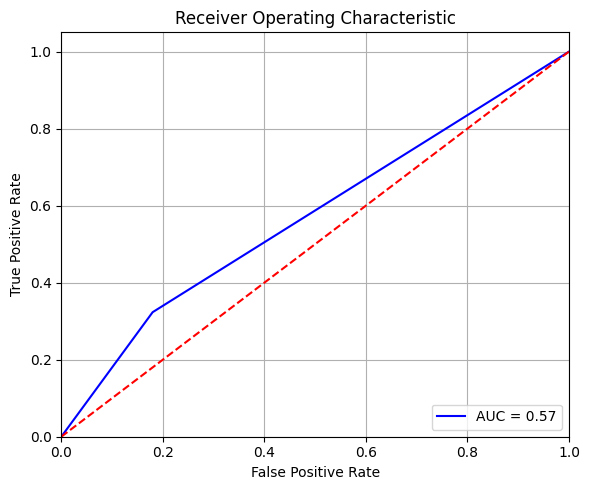

In [108]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
model_performance('Decision Tree Classifier', X_train, y_train, y_test, y_pred, clf)


**SGD Classifier**

In [109]:

# Apply RBF kernel transformation
rbf_feature = RBFSampler(gamma=1.0, random_state=1)
X_train_rbf = rbf_feature.fit_transform(X_train)

# Fit SGD classifier
clf = SGDClassifier(random_state=42)
clf.fit(X_train_rbf, y_train)


KeyboardInterrupt: 

Model name: Kernel approximation with SGD
Test accuracy (Accuracy Score): 0.7985
Test accuracy (ROC AUC Score): 0.5000
Area Under the Precision-Recall Curve: 0.6007


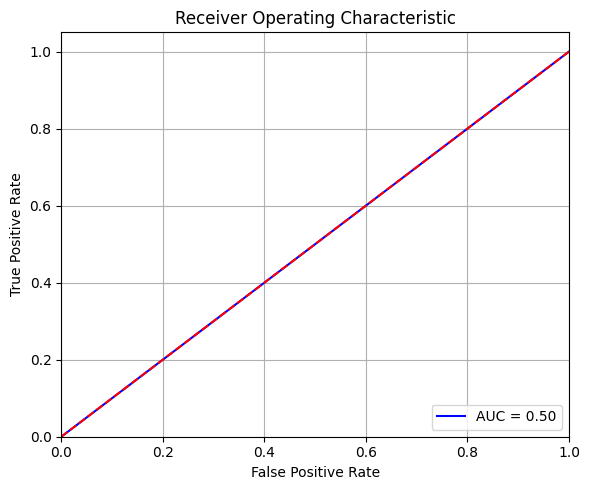

In [ ]:
X_test_rbf = rbf_feature.transform(X_test)
y_pred = clf.predict(X_test_rbf)
model_performance('Kernel approximation with SGD', X_train_rbf, y_train, y_test, y_pred)


**Random Forest Classifier**

Model name: Random Forest Classifier
Test accuracy (Accuracy Score): 0.8072
Test accuracy (ROC AUC Score): 0.5468
Area Under the Precision-Recall Curve: 0.4549


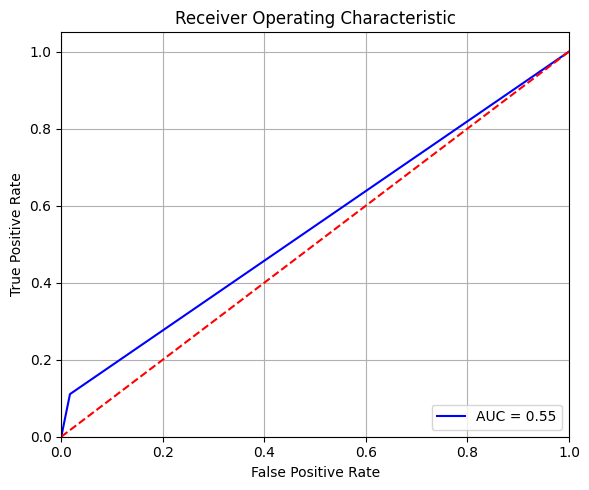

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_performance('Random Forest Classifier', X_train, y_train, y_test, y_pred)


**Gradient Boosting Classifier**

Model name: Gradient Boosting Classifier
Test accuracy (Accuracy Score): 0.7996
Test accuracy (ROC AUC Score): 0.5106
Area Under the Precision-Recall Curve: 0.3895


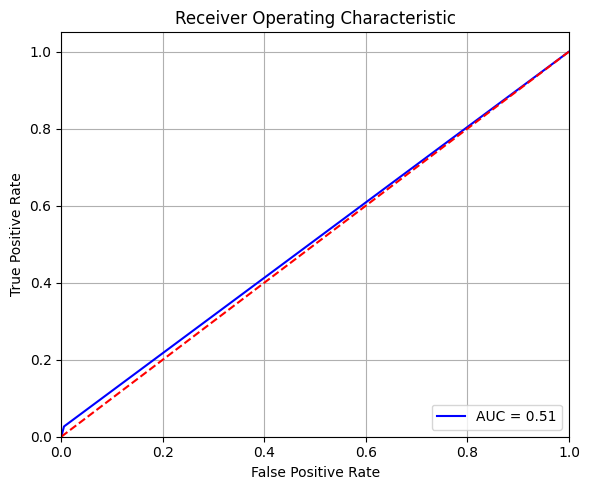

In [ ]:

# Initialize and train the model
clf = GradientBoostingClassifier(
    random_state=10,
    learning_rate=0.1,
    n_estimators=200,
    max_depth=5,
    max_features='sqrt'  # or a specific integer like 10
)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
model_performance('Gradient Boosting Classifier', X_train, y_train, y_test, y_pred)
